<h1 style="text-align: center;"> PRO REALTY REAL ESTATE INVESTOR</h1>

![](real-estate-investment-illustration.png)

## PROJECT OVERVIEW.
King County is located in the U.S. state of Washington. According to the 2020 census, it was the most populous county in Washington and the 13th-most populous in the United States. Given the King county's House Sales dataset, we undertook a research on behalf Pro Realty Real Estate Investors  to find out the best performing metrics affecting house sale prices. With the use of Multiple linear regression analysis we are able  to gain insights into the home sales market to help improve the home owners'/ investors' decision making when it comes to buying or investing in homes.

## BUSINESS PROBLEM.

Pro Realty, a leading real estate firm, is poised for expansion and aspires to solidify its position as the premier real estate investor. To achieve this goal, Pro Realty recognizes the critical need to optimize its Return on Investment (ROI). The company aims to leverage the vast potential within the King County dataset to seeks strategic insights and data-driven solutions to enhance decision-making, identify lucrative investment opportunities, and ultimately maximize ROI. How can Pro Realty harness the power of the King County dataset to inform its expansion strategy, mitigate risks, and position itself as a dominant force in the real estate market. 

## STAKE HOLDER(PRO REALTY) OBJECTIVES.
  1.Identify factors influencing house prices in King County.
  
  2.Predict housing prices with high accuracy.
  
  3.Make informed investment decisions by targetting properties with high potential returns.
  
  4.Minimise risk by avoiding overpaying for properties.
  
  5.Optimize portfolio diversification by investing in different neighbourhoods and property types.

### 1. Prepare kc_house_data.csv for analysis

include the relevant imports and load the data into a dataframe called df:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import mpl_toolkits
import statsmodels.api as sm
import calendar
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import ensemble
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


use df.describe to get a concise overview about data distribution within each column in our data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df['bathrooms'] = df['bathrooms'].astype(np.int64)
df['floors'] = df['floors'].astype(np.int64)
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda r:r.month)
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Oct
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Dec
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Feb
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Dec
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Feb


### DATA ANALYSIS AND PREPARATION
1.How are the various variables presented in our dataset are affecting housing prices.

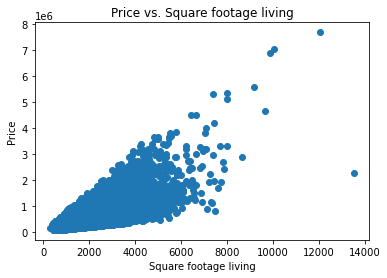

<Figure size 432x288 with 0 Axes>

In [7]:
# Analyze relationships between features (e.g., price vs. sqft_living)
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel('Square footage living')
plt.ylabel('Price')
plt.title('Price vs. Square footage living')
plt.show()
plt.savefig('price_vs_Square_footage_living')

this graph shows there is a positive linear correlation between squarefoot living and price which in turn makes it a very good property for predicing house sale prices.

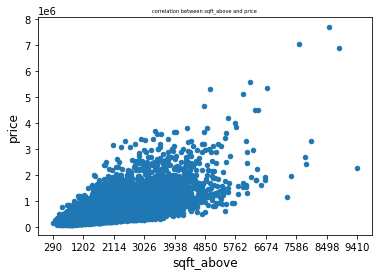

<Figure size 432x288 with 0 Axes>

In [8]:
count, bin_edges = np.histogram(df['sqft_above'], bins=10)
df.plot(
    kind='scatter',
    x='sqft_above',
    y='price', 
        xticks=bin_edges
        )
plt.title('correlation between sqft_above and price ', fontsize=5)
plt.xlabel('sqft_above', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()
plt.savefig('correlation_between_sqft_above_and_price')

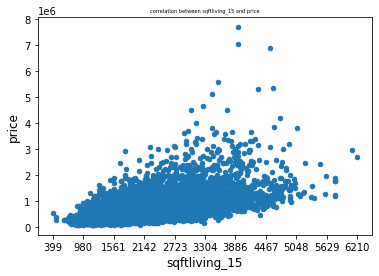

<Figure size 432x288 with 0 Axes>

In [9]:
count, bin_edges = np.histogram(df['sqft_living15'], bins=10)
df.plot(
    kind='scatter',
    x='sqft_living15',
    y='price', 
        xticks=bin_edges
        )
plt.title('correlation between sqftliving_15 and price', fontsize=5)
plt.xlabel('sqftliving_15', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()
plt.savefig('correlation_between_sqftliving_15_and_price')

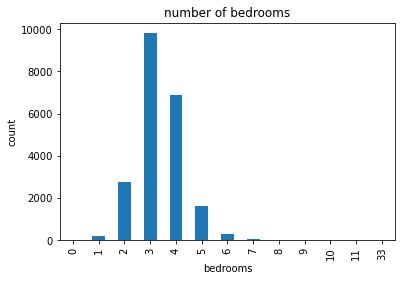

In [10]:
df['bedrooms'].value_counts().sort_values(ascending=True).reindex([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33]).plot(kind='bar')

plt.title('number of bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('count')
sns.despine
plt.savefig('number_of_bedrooms')

As one can observe from the above visualization 3 bedroom houses are the most popular among home buyers when looking for homes to buy followed by 4 bedroom houses.

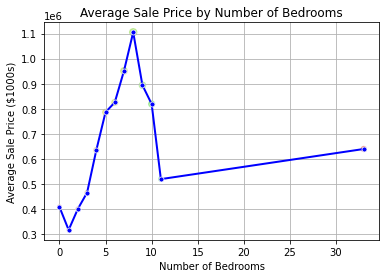

<Figure size 432x288 with 0 Axes>

In [11]:
# Group data by bedrooms and calculate average price
avg_price_by_bedrooms = df.groupby("bedrooms")["price"].mean().reset_index()

# Create scatter plot
sns.scatterplot(
    x="bedrooms",
    y="price",
    data=avg_price_by_bedrooms,
    hue="bedrooms",
    palette="hls",
    size="price",
    alpha=0.7,
    legend=False,
)

# Add smoother line
sns.lineplot(
    x="bedrooms",
    y="price",
    data=avg_price_by_bedrooms,
    color="blue",
    linewidth=2,
    marker="o",
    markersize=5,
)

# Customize plot
plt.title("Average Sale Price by Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Sale Price ($1000s)")
plt.grid(True)

# Show plot
plt.show()
plt.savefig('Average_Sale_Price_by_Number_of_Bedrooms')

The visualization above shows  the number of bedrooms can be a significant factor influencing housing prices, but it's important to consider the context and other factors at play. We shall proceed to  Analyze additional variables like location,year built,square footage etc. these can provide a much better understanding of the relationship between bedrooms and price in a specific mark.

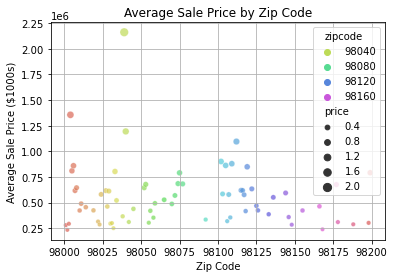

<Figure size 432x288 with 0 Axes>

In [12]:
avg_price_by_zip = df.groupby("zipcode")["price"].mean().reset_index()

sns.scatterplot(
    x="zipcode",
    y="price",
    data=avg_price_by_zip,
    size="price",  
    alpha=0.7,
    hue="zipcode",  
    palette="hls",  
)
plt.title("Average Sale Price by Zip Code")
plt.xlabel("Zip Code")
plt.ylabel("Average Sale Price ($1000s)")
plt.grid(True)
plt.show()
plt.savefig('Average_Sale_Price_by_Zip_Code')

Different areas have varying factors like desirability, proximity to amenities, and school quality affecting house prices.The scatter plot doesn't show a rich correlation between price and zipcode so will drop this column.

In [ ]:
plt.scatter(df['month'], df['price'])
plt.xlabel('month')
plt.ylabel('Price')
plt.title('Price vs. month')
plt.show()
plt.savefig('Price_vs_month')

In [ ]:
df=df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'grade', 
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
     'sqft_living15', 'sqft_lot15']]
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df.corr(),cmap = 'YlGnBu',annot=True,ax=ax)
plt.savefig('correlation_heatmap')

Key Points:

The numbers represent correlation coefficients, indicating the strength and relationships between variables.
These range from -1 (strong negative correlation) to 1 (strong positive correlation), with 0 indicating no correlation.
Positive coefficients suggest variables tend to increase or decrease together, while negative coefficients suggest opposite trends.
#### Strongest Positive Correlations with Price:

   .sqft_living (0.702): Suggests a strong positive relationship between house price and living space, indicating larger homes tend to have higher prices.
   
   .grade (0.667): Higher-grade homes (likely reflecting better quality and features) generally have higher prices.
   .bathrooms (0.525): Suggests homes with more bathrooms tend to have higher prices.
   
   .sqft_above (0.606): This reflects that above-ground living area is a significant factor influencing price.
#### Moderate Positive Correlations with Price:

   .sqft_living15 (0.585): This suggests living space in the surrounding area is also somewhat correlated with price.
   
   .view (0.397): Homes with better views tend to have higher prices.
   
   .bedrooms (0.308): More bedrooms are associated with higher prices, but the correlation is less strong than other factors.
#### Weak or No Correlation with Price:

   .id: the house ID is not informative for price prediction.
   
   .sqft_lot (0.089): Lot size has a very weak correlation with price.
   
   .yr_built (0.054): Year built has minimal correlation with price.

In [ ]:
df.columns

In [ ]:

df = pd.read_csv('kc_house_data.csv')
# Explore categorical features
print(df['waterfront'].value_counts())
print(df['condition'].value_counts())
print(df['grade'].value_counts())


Waterfront Access: Waterfront access is relatively rare, suggesting it might be a significant factor influencing house prices.

Condition Distribution: Houses are mostly in average or good condition, with fewer in very good or poor condition.

Grade Distribution: Grades are more evenly distributed, suggesting a wider range of quality levels in the housing market.

In [ ]:
df = pd.read_csv('kc_house_data.csv')
# Select the categorical features to encode
categorical_features = ['waterfront']

# One-hot encode the features
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Print the encoded DataFrame to see the new columns
df.head()


In [ ]:
# Specify columns to drop as a list
columns_to_drop = ['date', 'view', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']  

# Drop the columns
df = df.drop(columns_to_drop, axis=1)

# Verify the updated DataFrame
print(df.head())  
print(df.columns)  

### MODEL BUILDING AND PREDICTION 

#### SIMPLE LINEAR REGRESSION

In [ ]:
y = df['price']  
features = ['sqft_living']  
# Define features
X = df[features]  # Extract feature matrix

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)  # Split data

model = LinearRegression(fit_intercept=True)  # Create model instance
model.fit(X_train, y_train)  # Train the model

preds = model.predict(X_valid)  # Make predictions on validation set



In [ ]:
mse = mean_squared_error(y_valid, preds)
r2 = r2_score(y_valid, preds)
print("Mean squared error:", mse)
print("R-squared:", r2)



#### MULTIPLE LINEAR REGRESSION

Correlation Analysis:
referring to the correlation heatmap done earlier.Check the correlation between each feature and the target variable. Features with higher absolute correlation values are generally more influential for a regression model.

In [ ]:
correlation_matrix = df.corr()
correlation_with_price = correlation_matrix['price'].abs().sort_values(ascending=False)
print(correlation_with_price)


In [ ]:
y = df['price']  
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above', 'yr_built', 'waterfront_1']  
# Define features
X = df[features]  # Extract feature matrix

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)  # Split data

model = LinearRegression(fit_intercept=True)  # Create model instance
model.fit(X_train, y_train) # Train the model

preds = model.predict(X_valid)


In [ ]:
#asses the models accuracy
mse = mean_squared_error(y_valid, preds)
r2 = r2_score(y_valid, preds)
print("Mean squared error:", mse)
print("R-squared:", r2)


Improved Performance: The multiple linear regression model outperforms the simple model in terms of both MSE and R-squared. This indicates that incorporating multiple features leads to better predictions of house prices.

Compare the actual values to predicted values 

In [ ]:
y_train.head()

In [ ]:
preds

#### RESIDUAL CALCULATIONS.
we now need to measure how much the model's predictions vary from the true values.Doing this offers valuable insights into model performance and potential areas for improvement.
It can also help identify patterns in errors, suggesting model refinements.


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import probplot

# Calculate residuals
residuals = y_valid - preds

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(preds, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
plt.savefig('Residual_Plot')
# Histogram of residuals
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()
plt.savefig('Histogram_of_Residuals')
# Normal QQ plot
probplot(residuals, plot=plt)
plt.show()
plt.savefig('qq_plot')


In [ ]:
#linear regression model
coefficients = model.coef_
intercept = model.intercept_

# Print coefficients and intercept
print("Intercept:", intercept)
print("Coefficients:", dict(zip(features, coefficients)))


 Bedrooms:
For each additional bedroom, the predicted price decreases by approximately 40,534.

 Bathrooms:For each additional bathroom, the predicted price increases by approximately 45,644.
 
Sqft_living: For each additional square foot of living space, the predicted price increases by approximately 193.61.

Sqft_lot: For each additional square foot of the lot, the predicted price decreases by approximately 0.23 (note: the coefficient is small, suggesting this feature may not have a strong impact).

Floors: For each additional floor, the predicted price increases by approximately 28,277.

Condition: For each unit increase in condition, the predicted price increases by approximately 17,488.

Grade: For each increase in the grade, the predicted price increases by approximately 128,293.

Sqft_above: For each additional square foot above ground, the predicted price decreases by approximately 16.31.

Yr_built: For each additional year of the building's age, the predicted price decreases by approximately 3,791.68.

Waterfront_1: If the property has waterfront (coded as 1), the predicted price increases by approximately 740,707.


From the above analysis the following are our key features;

    Grade
    Waterfront
    Bathrooms
    sqft_living
    floors

In [ ]:
# Key features
key_features = ['grade', 'waterfront_1', 'bathrooms', 'sqft_living', 'floors']

# Plotting relationships with the target variable
plt.figure(figsize=(15, 8))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[feature], y=df['price'])
    plt.title(f'{feature.capitalize()} vs. Price')

plt.tight_layout()
plt.show()
plt.savefig('realtionship_variable_graph')

Interpretation:
Grade: As the grade increases, the price tends to increase, indicating a positive relationship.

Waterfront: Properties with waterfront (coded as 1) tend to have significantly higher prices.

Bathrooms: The price tends to increase with the number of bathrooms.

Sqft_living: A positive relationship between square footage of living space and price.

Floors: Properties with more floors tend to have higher prices.


### RECOMMENDATIONS
Consider the following key features as having a positive impact on predicted prices therefore potentially increasing Pro Realty's ROI(return on investment)

Waterfront Properties:
As observed the properties with waterfront according to our model are seen to have significantly higher prices. Pro Realty should consider marketing strategies that highlight and capitalize on this desirable feature.

Grade:
is defined as the assesment of the overall quality of construction build.A higher grade value indicates good quality finishes and construction.This features reflects how the good quality of a property could influence buyers to pay premium.

Bathrooms:
The number of bathrooms in a property indicates functionality and convinience.Catering to the needs of larger families.Properties with multiple bathrooms are likely to attract a much wider range of buyers.

sqft_living:
This is the total square footage of the living space.The positive relationship aligns with the common expectation that larger homes provide more space and amenities catering to various preferences of potential buyers.

Floors:
The positve relationship between floors and price suggests that properties with more floors generate higher sale prices.



### CONCLUSION
The multiple linear regression model between the various features and price provides an insight into how changes in feature in turn affects changes in predicted prices,However we should acknowledge the limitations of the model.While it captures linear relationships , it may not capture complex interactions between features.So Pro Realty should continue the refinement of the model by exploring additional features in the subsequent years as well as adopting Advanced techniques. 